In [37]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Data Cleaning & Pre-processing

In [74]:
df=pd.read_csv(r"F:\All downloads for Upgrad\Uber project\Dataset_Uber Traffic.csv")
df.head()

,DateTime,Junction,Vehicles,ID
0,01-11-2015 00:00,1,15,20151101001
1,01-11-2015 01:00,1,13,20151101011
2,01-11-2015 02:00,1,10,20151101021
3,01-11-2015 03:00,1,7,20151101031
4,01-11-2015 04:00,1,9,20151101041


In [76]:
df.shape

(48120, 4)

In [78]:
df.describe()

,Junction,Vehicles,ID
count,48120.000000,48120.000000,4.812000e+04
mean,2.180549,22.791334,2.016330e+10
std,0.966955,20.750063,5.944854e+06
min,1.000000,1.000000,2.015110e+10
25%,1.000000,9.000000,2.016042e+10
50%,2.000000,15.000000,2.016093e+10
75%,3.000000,29.000000,2.017023e+10
max,4.000000,180.000000,2.017063e+10


In [80]:
df.describe(include= 'object')

,DateTime
count,48120
unique,14592
top,30-06-2017 23:00
freq,4


In [82]:
# checking missing values
df.isnull().sum()

DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64

In [84]:
# Convert DateTime to proper datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%d-%m-%Y %H:%M')
df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [86]:
df.shape

(48120, 4)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  48120 non-null  datetime64[ns]
 1   Junction  48120 non-null  category      
 2   Vehicles  48120 non-null  int64         
 3   ID        48120 non-null  int64         
dtypes: category(1), datetime64[ns](1), int64(2)
memory usage: 1.1 MB


In [90]:
# aggregate traffic volumes by hour and junction
df_agg = df.groupby(['DateTime', 'Junction'], as_index=False)['Vehicles'].sum()
df_agg

,DateTime,Junction,Vehicles
0,2015-11-01 00:00:00,1,15
1,2015-11-01 00:00:00,2,6
2,2015-11-01 00:00:00,3,9
3,2015-11-01 01:00:00,1,13
4,2015-11-01 01:00:00,2,6
...,...,...,...
48115,2017-06-30 22:00:00,4,22
48116,2017-06-30 23:00:00,1,78
48117,2017-06-30 23:00:00,2,27
48118,2017-06-30 23:00:00,3,39


In [92]:
# Standardize the Vehicles column
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_agg['Vehicles_scaled'] = scaler.fit_transform(df_agg[['Vehicles']])

In [96]:
# Creation of time-based features
df_agg['hour'] = df_agg['DateTime'].dt.hour
df_agg['day_of_week'] = df_agg['DateTime'].dt.dayofweek
df_agg['month'] = df_agg['DateTime'].dt.month
df_agg['is_weekend'] = df_agg['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

In [98]:
df_agg

,DateTime,Junction,Vehicles,Vehicles_scaled,hour,day_of_week,month,is_weekend
0,2015-11-01 00:00:00,1,15,-0.375489,0,6,11,1
1,2015-11-01 00:00:00,2,6,-0.809227,0,6,11,1
2,2015-11-01 00:00:00,3,9,-0.664648,0,6,11,1
3,2015-11-01 01:00:00,1,13,-0.471875,1,6,11,1
4,2015-11-01 01:00:00,2,6,-0.809227,1,6,11,1
...,...,...,...,...,...,...,...,...
48115,2017-06-30 22:00:00,4,22,-0.038137,22,4,6,0
48116,2017-06-30 23:00:00,1,78,2.660678,23,4,6,0
48117,2017-06-30 23:00:00,2,27,0.202829,23,4,6,0
48118,2017-06-30 23:00:00,3,39,0.781146,23,4,6,0


In [102]:
# Generate laf features
df_agg.sort_values(['Junction', 'DateTime'], inplace=True)
for lag in [1, 2, 3]:
    df_agg[f'lag_{lag}'] = df_agg.groupby('Junction')['Vehicles'].shift(lag)

In [104]:
df_agg

,DateTime,Junction,Vehicles,Vehicles_scaled,hour,day_of_week,month,is_weekend,lag_1,lag_2,lag_3
0,2015-11-01 00:00:00,1,15,-0.375489,0,6,11,1,NaN,NaN,NaN
3,2015-11-01 01:00:00,1,13,-0.471875,1,6,11,1,15.0,NaN,NaN
6,2015-11-01 02:00:00,1,10,-0.616454,2,6,11,1,13.0,15.0,NaN
9,2015-11-01 03:00:00,1,7,-0.761034,3,6,11,1,10.0,13.0,15.0
12,2015-11-01 04:00:00,1,9,-0.664648,4,6,11,1,7.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...
48103,2017-06-30 19:00:00,4,11,-0.568261,19,4,6,0,17.0,16.0,16.0
48107,2017-06-30 20:00:00,4,30,0.347408,20,4,6,0,11.0,17.0,16.0
48111,2017-06-30 21:00:00,4,16,-0.327296,21,4,6,0,30.0,11.0,17.0
48115,2017-06-30 22:00:00,4,22,-0.038137,22,4,6,0,16.0,30.0,11.0


In [106]:
# Drop Rows with NaN (due to lags)
df_final = df_agg.dropna().reset_index(drop=True)

In [108]:
df_final

,DateTime,Junction,Vehicles,Vehicles_scaled,hour,day_of_week,month,is_weekend,lag_1,lag_2,lag_3
0,2015-11-01 03:00:00,1,7,-0.761034,3,6,11,1,10.0,13.0,15.0
1,2015-11-01 04:00:00,1,9,-0.664648,4,6,11,1,7.0,10.0,13.0
2,2015-11-01 05:00:00,1,6,-0.809227,5,6,11,1,9.0,7.0,10.0
3,2015-11-01 06:00:00,1,9,-0.664648,6,6,11,1,6.0,9.0,7.0
4,2015-11-01 07:00:00,1,8,-0.712841,7,6,11,1,9.0,6.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...
48103,2017-06-30 19:00:00,4,11,-0.568261,19,4,6,0,17.0,16.0,16.0
48104,2017-06-30 20:00:00,4,30,0.347408,20,4,6,0,11.0,17.0,16.0
48105,2017-06-30 21:00:00,4,16,-0.327296,21,4,6,0,30.0,11.0,17.0
48106,2017-06-30 22:00:00,4,22,-0.038137,22,4,6,0,16.0,30.0,11.0


# 2. EDA

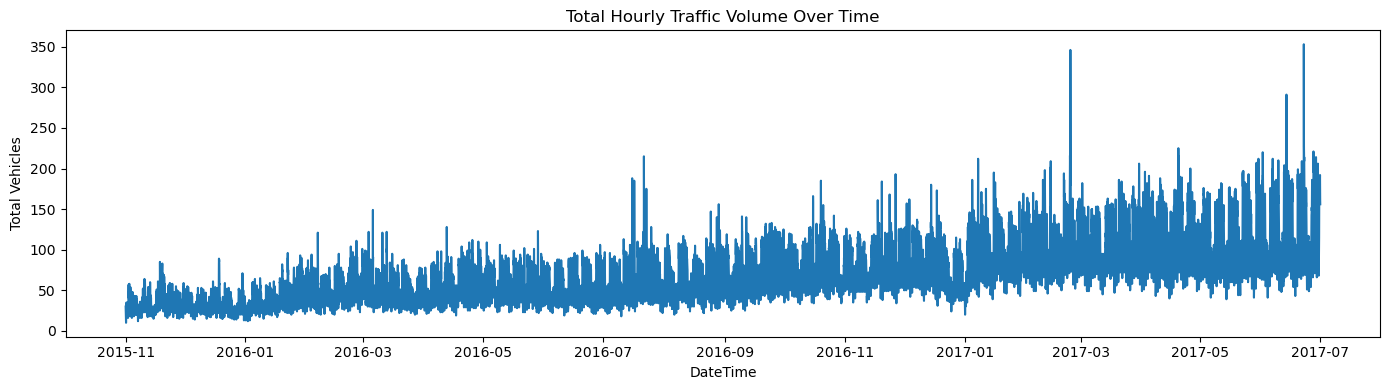

In [112]:
# Aggregate total traffic per hour (all junctions)
df_hourly = df_agg.groupby('DateTime')['Vehicles'].sum()

plt.figure(figsize=(14, 4))
plt.plot(df_hourly.index, df_hourly.values)
plt.title("Total Hourly Traffic Volume Over Time")
plt.xlabel("DateTime")
plt.ylabel("Total Vehicles")
plt.tight_layout()
plt.show()

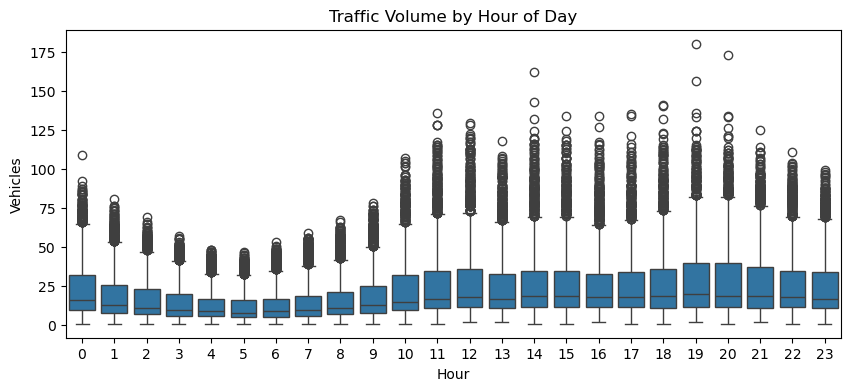

In [114]:
#  Traffic by Hour of the Day (Rush Hours)
plt.figure(figsize=(10, 4))
sns.boxplot(x='hour', y='Vehicles', data=df_agg)
plt.title("Traffic Volume by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Vehicles")
plt.show()

##### Traffic volume is lowest during late-night and early-morning hours (0–6 AM) and peaks steadily from late morning through evening (11 AM–8 PM), indicating high vehicle flow during work and commute hours.

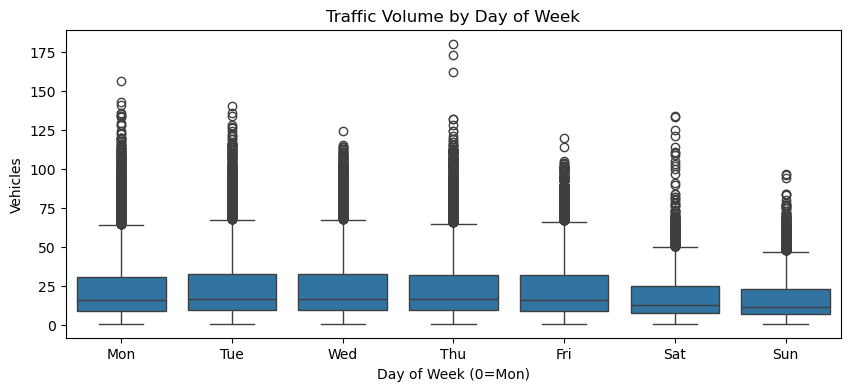

In [118]:
# Traffic by Day of the Week
plt.figure(figsize=(10, 4))
sns.boxplot(x='day_of_week', y='Vehicles', data=df_agg)
plt.title("Traffic Volume by Day of Week")
plt.xlabel("Day of Week (0=Mon)")
plt.ylabel("Vehicles")
day_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.xticks(ticks=range(7), labels=day_labels)
plt.show()

##### Traffic volume is generally higher and more consistent on weekdays (Monday to Friday), while weekends (Saturday and Sunday) show a noticeable drop in median traffic and overall volume.

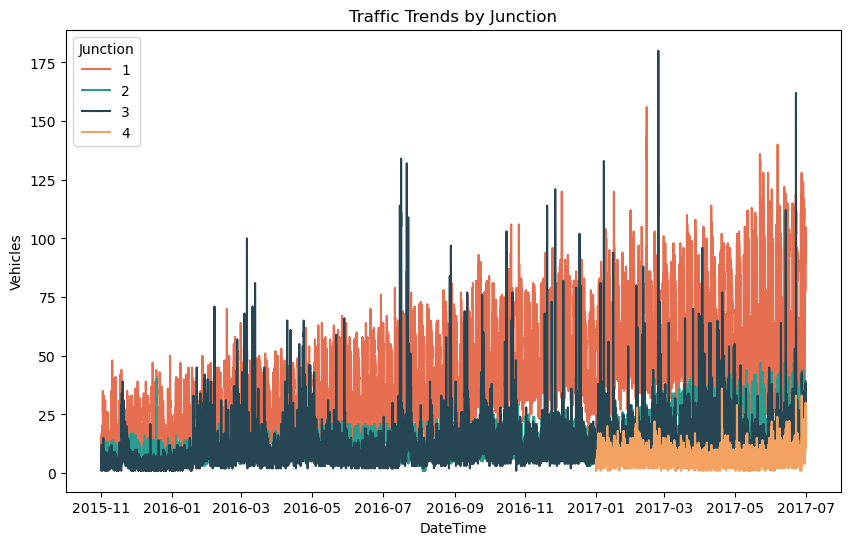

In [134]:
# Traffic Patterns per Junction 

# custom colors for each Junction
custom_palette = {
    1: '#E76F51',  # Red-Orange
    2: '#2A9D8F',  # Teal
    3: '#264653',  # Navy Blue
    4: '#F4A261'   # Light Orange
} 
plt.figure(figsize=(10, 6))
sns.lineplot(x='DateTime', y='Vehicles', hue='Junction', data=df_agg, palette=custom_palette)
plt.title("Traffic Trends by Junction")
plt.xlabel("DateTime")
plt.ylabel("Vehicles")
plt.legend(title='Junction')
plt.show()

##### Junction 1 consistently experiences the highest traffic volume and a clear upward trend over time, while Junctions 2, 3, and 4 have lower and more stable volumes. Junction 4 data starts later (around early 2017), indicating it may have been added to the monitoring system at a later date.

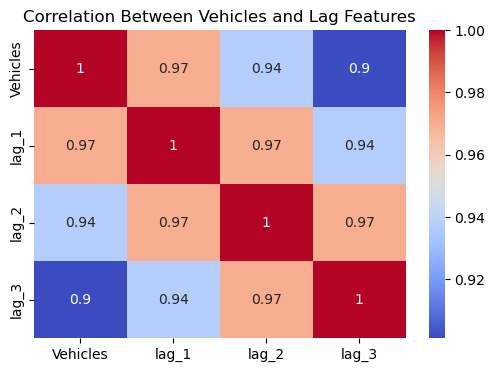

In [122]:
# Check correlation between target and lag features
lag_cols = ['lag_1', 'lag_2', 'lag_3']
correlations = df_agg[['Vehicles'] + lag_cols].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title("Correlation Between Vehicles and Lag Features")
plt.show()

##### There is a strong positive correlation between the current vehicle count and its lag features (lag_1, lag_2, lag_3), with correlations ranging from 0.90 to 0.97. This indicates that past traffic volumes are highly predictive of current volumes